### Beginner Level Task 1: Iris Flowers Classification
### Concept Used: Supervised Machine Learning
### Author: Prateek Shah

In [394]:
# Importing some required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [395]:
# Loading the dataset
iris = pd.read_csv('iris.csv')

In [396]:
# Displaying the dataset
iris

,sep_len,sep_wid,pet_len,pet_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [397]:
# Displaying information about the dataset.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sep_len  150 non-null    float64
 1   sep_wid  150 non-null    float64
 2   pet_len  150 non-null    float64
 3   pet_wid  150 non-null    float64
 4   class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [398]:
# Displaing number of records having NULL values in the respective columns
iris.isna().sum()

sep_len    0
sep_wid    0
pet_len    0
pet_wid    0
class      0
dtype: int64

In [399]:
# Encoding the categorical variable using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder =  LabelEncoder()
iris['class'] = label_encoder.fit_transform(iris['class'])
iris['class'].unique()

array([0, 1, 2])

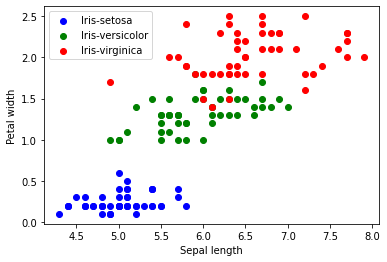

In [400]:
# Plotting the scatter plot of Petal width vs Sepal length
sep_len_val1 = iris.loc[iris['class']==0]['sep_len'].values
sep_wid_val1 = iris.loc[iris['class']==0]['pet_wid'].values
plt.scatter(sep_len_val1, sep_wid_val1, c ="blue", label='Iris-setosa')

sep_len_val2 = iris.loc[iris['class']==1]['sep_len'].values
sep_wid_val2 = iris.loc[iris['class']==1]['pet_wid'].values
plt.scatter(sep_len_val2, sep_wid_val2, c ="green", label='Iris-versicolor')

sep_len_val3 = iris.loc[iris['class']==2]['sep_len'].values
sep_wid_val3 = iris.loc[iris['class']==2]['pet_wid'].values
plt.scatter(sep_len_val3, sep_wid_val3, c ="red", label='Iris-virginica')
plt.legend()
plt.xlabel('Sepal length')
plt.ylabel('Petal width')
plt.show()

In [401]:
# Performed Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(iris, iris['class']):
    strat_train_set = iris.loc[train_index]
    strat_test_set = iris.loc[test_index]

In [402]:
# Divided the train and test data into features and labels
X_train = strat_train_set.drop("class", axis=1)
y_train = strat_train_set["class"].copy()
X_test = strat_test_set.drop("class", axis=1)
y_test = strat_test_set["class"].copy()

In [403]:
# Instantiating the Naive Bayes model and fitting the training data
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_train, y_train)

GaussianNB()

In [404]:
# Instantiating the SVM model and fitting the training data
from sklearn import svm
model2 = svm.SVC(kernel="linear")
model2.fit(X_train, y_train)

SVC(kernel='linear')

In [405]:
# Displaying the test features
X_test

,sep_len,sep_wid,pet_len,pet_wid
36,5.5,3.5,1.3,0.2
55,5.7,2.8,4.5,1.3
44,5.1,3.8,1.9,0.4
134,6.1,2.6,5.6,1.4
39,5.1,3.4,1.5,0.2
90,5.5,2.6,4.4,1.2
147,6.5,3.0,5.2,2.0
47,4.6,3.2,1.4,0.2
3,4.6,3.1,1.5,0.2
81,5.5,2.4,3.7,1.0


In [406]:
# Displaying the predicted values from test features and displaying the accuracy of the respective models
from sklearn.metrics import accuracy_score

def result(model):
    print("Using ", model)
    pred = model.predict(X_test)
    result_df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
    print(result_df)
    print(f"Accuracy score using {model}: {accuracy_score(pred, y_test)}")
    
result(model1)
print("\n")
result(model2)

Using  GaussianNB()
     Actual  Predicted
36        0          0
55        1          1
44        0          0
134       2          1
39        0          0
90        1          1
147       2          2
47        0          0
3         0          0
81        1          1
136       2          2
88        1          1
54        1          1
139       2          2
67        1          1
142       2          2
113       2          2
65        1          1
50        1          1
46        0          0
19        0          0
121       2          2
103       2          2
129       2          2
21        0          0
86        1          1
99        1          1
100       2          2
0         0          0
9         0          0
Accuracy score using GaussianNB(): 0.9666666666666667


Using  SVC(kernel='linear')
     Actual  Predicted
36        0          0
55        1          1
44        0          0
134       2          2
39        0          0
90        1          1
147       2          2

In [407]:
# Predicting the species of iris flower if sepal length=4.8cm., sepal width=3.4cm., petal length=1.2cm., petal width=0.1cm
features_pred = [[4.8, 3.4, 1.2, 0.1]]
pred2 = model1.predict(features_pred)
print("Prediction using Naive Bayes: ", label_encoder.inverse_transform(pred2))
pred3 = model2.predict(features_pred)
print("Prediction using SVM:", label_encoder.inverse_transform(pred3))

Prediction using Naive Bayes:  ['Iris-setosa']
Prediction using SVM: ['Iris-setosa']
